
# ETHZ: 227-0966-00L
# Quantitative Big Imaging
# February 28, 2019

## Ground Truth: Building and Augmenting Datasets



# Overview

## Motivation

## Creating Datasets
- Famous Datasets
- What makes a good dataet?
- Types of Datasets
- Experiments with Datasets
- Building your own 
 - "scrape, mine, move, annotate, review, and preprocess" - Kathy Scott
 - simulations

## Augmentation
- How can you artifically increase the size of your dataset?
- What are the limits of these increases

# Motivation
Most of you taking this class are rightfully excited to learn about new tools and algorithms to analyzing your data. This lecture is a bit of an anomaly and perhaps disappointment because it doesn't cover any algorithms, or tools.
- So you might ask, why are we spending so much time on datasets?
- You already collected data (sometimes lots of it) that is why you took this class?!

![Sean Taylor (Research Scientist at Facebook)](../common/figures/data_tweet.jpg)

![Andrej Karpathy (Director of AI at Tesla)](../common/figures/karpathy_slide.jpg)

![Kathy Scott (Image Analytics Lead at Planet Labs)](../common/figures/kathy_tweet.png)

## Data is important
It probably [isn't the _new_ oil](https://www.forbes.com/sites/bernardmarr/2018/03/05/heres-why-data-is-not-the-new-oil/), but it forms an essential component for building modern tools today.
- Testing good algorithms *requires* good data
 - If you don't know what to expect how do you know your algorithm worked?
 - If you have dozens of edge cases how can you make sure it works on each one?
 - If a new algorithm is developed every few hours, how can you be confident they actually work better (facebook's site has a new version multiple times per day and their app every other day)

- For machine learning, even building requires good data
 - If you count cells maybe you can write your own algorithm,
 - but if you are trying to detect subtle changes in cell structure that indicate cancer you probably can't write a list of simple mathematical rules yourself.

## Data is reusable
Well organized and structure data is very easy to reuse. Another project can easily combine your data with their data in order to get even better results.
- Algorithms are messy, complicated, poorly written, ... (especially so if written by students trying to graduate on time)

# Famous Datasets
The primary success of datasets has been shown through the most famous datasets collected. Here I show 2 of the most famous general datasets and one of the most famous medical datasets. The famous datasets are important for 

- [MNIST Digits](http://yann.lecun.com/exdb/mnist/)
 - Modified NIST (National Institute of Standards and Technology) created a list of handwritten digits
 - ![Digits](https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/mnist.png)

- [ImageNet](http://www.image-net.org)
 - ImageNet is an image database organized according to the WordNet hierarchy (currently only the nouns), in which each node of the hierarchy is depicted by hundreds and thousands of images.
 - 1000 different categories and >1M images.
 - Not just dog/cat, but wolf vs german shepard, 
 
![Performance](https://cdn-images-1.medium.com/max/1600/1*DBXf6dzNB78QPHGDofHA4Q.png)


- [BRATS](http://braintumorsegmentation.org) 
 - Segmenting Tumors in Multimodal MRI Brain Images.
 - ![Sample](https://www.med.upenn.edu/sbia/assets/user-content/BRATS_tasks.png)


## What story did these datasets tell?
Each of these datasets is very different from images with fewer than 1000 pixels to images with more than 100MPx, but what they have in common is how their analysis has changed.
### Hand-crafted features
All of these datasets used to be analyzed by domain experts with hand-crafted features. 
- A handwriting expert using graph topology to assign images to digits
- A computer vision expert using gradients common in faces to identify people in ImageNet
- A biomedical engineer using knowledge of different modalities to fuse them together and cluster healthy and tumorous tissue

### Machine Learning / Deep Learning
Starting in the early 2010s, the approaches of deep learning began to improve and become more computationally efficient. With these techniques groups with absolutely no domain knowledge could begin building algorithms and winning contests based on these datasets

## So Deep Learning always wins? 
No, that isn't the point of this lecture. Even if you aren't using deep learning the point of these stories is having well-labeled, structured, and organized datasets makes your problem a lot more accessible for other groups and enables a variety of different approaches to be tried. Ultimately it enables better solutions to be made and you to be confident that the solutions are in fact better

## Other Datasets
- Grand-Challenge.org a large number of challenges in the biomedical area
- [Kaggle Datasets](https://www.kaggle.com/datasets]
- Google Dataset Search


# What makes a good dataset?

- Lots of images
 - Small datasets can be useful but here the bigger the better
 - Particularly if you have complicated problems and/or very subtle differences (ie a lung tumor looks mostly like normal lung tissue but it is in a place it shouldn't be)
- Lots of diversity
 - Is it what data 'in the wild' really looks like?
 - Lots of different scanners/reconstruction algorithms, noise, illumination types, rotation, colors, ...
 - Many examples from different categories (if you only have one male with breast cancer it will be hard to generalize exactly what that looks like)
- Meaningful labels
 - Clear task or question
 - Unambiguous (would multiple different labelers come to the same conclusion)
 - Able to be derived from the image alone (a label that someone cannot afford insurance is interesting but it would be nearly impossible to determine that from an X-ray of their lungs)
 - Quantiative!
 - Non-obvious (a label saying an image is bright is not a helpful label because you could look at the histogram and say that)

# Types of Datasets
- Classification
 - Taking an image and putting it into a category
 - Each image should have exactly one category
 - The categories should be non-ordered
 - Example: 
   - Cat vs Dog
   - Cancer vs Healthy
- Regression
 - Taking an image and predicting one (or more) decimal values
 - Examples: 
   - Value of a house from the picture taken by owner
   - Risk of hurricane from satellite image
- Segmentation
 - Taking an image and predicting one (or more) values for each pixel
 - Every pixel needs a label (and a pixel cannot have multiple labels)
 - Typically limited to a few (<20) different types of objects
 - Examples:
     - Where a tumor is from an image of the lungs
     - Where streets are from satellite images of a neighborhood
- Detection
 - Taking an image and predicting where and which type of objects appear
 - Generally bounding box rather then specific pixels
 - Multiple objects can overlap
- Other
 - Unlimited possibilities [here](https://junyanz.github.io/CycleGAN/)
 - Horses to Zebras 

# Exploring Datasets
Here we explore a few datasets and see the effect of 
- imbalance
- too few examples
- too homogenous 
- and other possible problems


/anaconda3/envs/qbi2019/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/envs/qbi2019/lib/python3.6/site-packages/skimage/util/_montage.py:142: skimage_deprecation: Function ``montage2d`` is deprecated and will be removed in version 0.15. Use ``montage`` instead.
  def montage2d(arr_in, fill='mean', rescale_intensity=False, grid_shape=None,


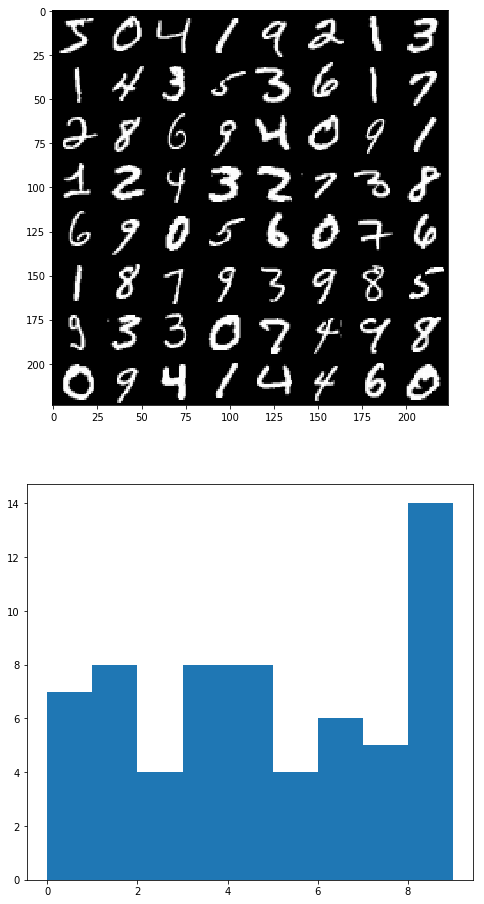

In [1]:
%matplotlib inline
from skimage.util import montage2d
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
(img, label), _ = mnist.load_data()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 16))
ax1.imshow(montage2d(img[:64]), cmap='gray')
ax2.hist(label[:64], np.arange(10));